In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [50]:
df_news = pd.read_csv('gold_news_2023_2025.csv')
df_news

,date,title
0,2023-01-01,Gold prices rise as inflation fears ease
1,2023-01-02,Federal Reserve signals no immediate rate hike...
2,2023-01-03,Global demand for gold increases amid economic...
3,2023-01-04,Central banks increase gold reserves to hedge ...
4,2023-01-05,Gold retreats after stronger US jobs report
...,...,...
876,2025-05-26,Gold retreats after stronger US jobs report
877,2025-05-27,Investors turn to gold as safe haven amid geop...
878,2025-05-28,Gold prices steady despite rising dollar
879,2025-05-29,Commodity markets watch gold after mixed econo...


In [51]:
df_gold = pd.read_csv('gold-f.csv')
df_gold

,Date,Price,Open,High,Low,Vol.,Change %
0,05/30/2025,"3,315.40","3,343.20","3,347.00","3,294.80",184.77K,-0.85%
1,05/29/2025,"3,343.90","3,311.80","3,356.30","3,269.10",227.94K,1.08%
2,05/28/2025,"3,308.30","3,317.30","3,337.50","3,287.90",2.76K,-0.16%
3,05/27/2025,"3,313.70","3,369.60","3,369.60","3,297.90",4.19K,-1.80%
4,05/26/2025,"3,374.47","3,370.17","3,384.00","3,352.50",29.79K,0.12%
...,...,...,...,...,...,...,...
614,01/09/2023,"1,877.80","1,872.80","1,886.40","1,869.30",204.55K,0.43%
615,01/06/2023,"1,869.70","1,835.90","1,875.20","1,835.20",215.37K,1.58%
616,01/05/2023,"1,840.60","1,861.20","1,864.30","1,829.90",188.60K,-0.99%
617,01/04/2023,"1,859.00","1,845.20","1,871.30","1,842.00",198.35K,0.70%


In [52]:
def convert_volume(volume_str):
    if isinstance(volume_str, str) and 'K' in volume_str:
        return float(volume_str.replace('K', '').replace(',', '')) * 1000
    else:
        # If no 'K' just convert to float (after removing commas)
        return float(volume_str.replace(',', '')) if isinstance(volume_str, str) else volume_str

# Apply the function to the 'Volume' column (assuming the 7th column is 'Volume')
df_gold['Vol.'] = df_gold['Vol.'].apply(convert_volume)

In [53]:
df_gold['Date'] = pd.to_datetime(df_gold['Date'])

df_gold['Date'] = df_gold['Date'].dt.strftime('%Y-%m-%d')

In [54]:
df_gold

,Date,Price,Open,High,Low,Vol.,Change %
0,2025-05-30,"3,315.40","3,343.20","3,347.00","3,294.80",184770.0,-0.85%
1,2025-05-29,"3,343.90","3,311.80","3,356.30","3,269.10",227940.0,1.08%
2,2025-05-28,"3,308.30","3,317.30","3,337.50","3,287.90",2760.0,-0.16%
3,2025-05-27,"3,313.70","3,369.60","3,369.60","3,297.90",4190.0,-1.80%
4,2025-05-26,"3,374.47","3,370.17","3,384.00","3,352.50",29790.0,0.12%
...,...,...,...,...,...,...,...
614,2023-01-09,"1,877.80","1,872.80","1,886.40","1,869.30",204550.0,0.43%
615,2023-01-06,"1,869.70","1,835.90","1,875.20","1,835.20",215370.0,1.58%
616,2023-01-05,"1,840.60","1,861.20","1,864.30","1,829.90",188600.0,-0.99%
617,2023-01-04,"1,859.00","1,845.20","1,871.30","1,842.00",198350.0,0.70%


In [55]:
df_news.rename(columns={'date': 'Date'}, inplace=True)
df_news.rename(columns={'title': 'News'}, inplace=True)

In [56]:
df_news.set_index(keys=["Date"], inplace=True)
df_news

,News
Date,
2023-01-01,Gold prices rise as inflation fears ease
2023-01-02,Federal Reserve signals no immediate rate hike...
2023-01-03,Global demand for gold increases amid economic...
2023-01-04,Central banks increase gold reserves to hedge ...
2023-01-05,Gold retreats after stronger US jobs report
...,...
2025-05-26,Gold retreats after stronger US jobs report
2025-05-27,Investors turn to gold as safe haven amid geop...
2025-05-28,Gold prices steady despite rising dollar


In [57]:
df_gold.set_index(keys=["Date"], inplace=True)
df_gold.sort_index(inplace=True)
df_gold

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2023-01-03,"1,846.10","1,831.80","1,856.60","1,831.30",212270.0,1.09%
2023-01-04,"1,859.00","1,845.20","1,871.30","1,842.00",198350.0,0.70%
2023-01-05,"1,840.60","1,861.20","1,864.30","1,829.90",188600.0,-0.99%
2023-01-06,"1,869.70","1,835.90","1,875.20","1,835.20",215370.0,1.58%
2023-01-09,"1,877.80","1,872.80","1,886.40","1,869.30",204550.0,0.43%
...,...,...,...,...,...,...
2025-05-26,"3,374.47","3,370.17","3,384.00","3,352.50",29790.0,0.12%
2025-05-27,"3,313.70","3,369.60","3,369.60","3,297.90",4190.0,-1.80%
2025-05-28,"3,308.30","3,317.30","3,337.50","3,287.90",2760.0,-0.16%


In [58]:
df = pd.merge(left=df_gold, right=df_news, right_index=True, left_index=True)
df

,Price,Open,High,Low,Vol.,Change %,News
Date,,,,,,,
2023-01-03,"1,846.10","1,831.80","1,856.60","1,831.30",212270.0,1.09%,Global demand for gold increases amid economic...
2023-01-04,"1,859.00","1,845.20","1,871.30","1,842.00",198350.0,0.70%,Central banks increase gold reserves to hedge ...
2023-01-05,"1,840.60","1,861.20","1,864.30","1,829.90",188600.0,-0.99%,Gold retreats after stronger US jobs report
2023-01-06,"1,869.70","1,835.90","1,875.20","1,835.20",215370.0,1.58%,Investors turn to gold as safe haven amid geop...
2023-01-09,"1,877.80","1,872.80","1,886.40","1,869.30",204550.0,0.43%,Gold prices rise as inflation fears ease
...,...,...,...,...,...,...,...
2025-05-26,"3,374.47","3,370.17","3,384.00","3,352.50",29790.0,0.12%,Gold retreats after stronger US jobs report
2025-05-27,"3,313.70","3,369.60","3,369.60","3,297.90",4190.0,-1.80%,Investors turn to gold as safe haven amid geop...
2025-05-28,"3,308.30","3,317.30","3,337.50","3,287.90",2760.0,-0.16%,Gold prices steady despite rising dollar


In [59]:
df.rename(columns={'Vol.': 'Volume'}, inplace=True)
df.rename(columns={'Change %': 'Change'}, inplace=True)
df.rename(columns={'Price': 'Close'}, inplace=True)

In [60]:
df

,Close,Open,High,Low,Volume,Change,News
Date,,,,,,,
2023-01-03,"1,846.10","1,831.80","1,856.60","1,831.30",212270.0,1.09%,Global demand for gold increases amid economic...
2023-01-04,"1,859.00","1,845.20","1,871.30","1,842.00",198350.0,0.70%,Central banks increase gold reserves to hedge ...
2023-01-05,"1,840.60","1,861.20","1,864.30","1,829.90",188600.0,-0.99%,Gold retreats after stronger US jobs report
2023-01-06,"1,869.70","1,835.90","1,875.20","1,835.20",215370.0,1.58%,Investors turn to gold as safe haven amid geop...
2023-01-09,"1,877.80","1,872.80","1,886.40","1,869.30",204550.0,0.43%,Gold prices rise as inflation fears ease
...,...,...,...,...,...,...,...
2025-05-26,"3,374.47","3,370.17","3,384.00","3,352.50",29790.0,0.12%,Gold retreats after stronger US jobs report
2025-05-27,"3,313.70","3,369.60","3,369.60","3,297.90",4190.0,-1.80%,Investors turn to gold as safe haven amid geop...
2025-05-28,"3,308.30","3,317.30","3,337.50","3,287.90",2760.0,-0.16%,Gold prices steady despite rising dollar


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 619 entries, 2023-01-03 to 2025-05-30
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   619 non-null    object 
 1   Open    619 non-null    object 
 2   High    619 non-null    object 
 3   Low     619 non-null    object 
 4   Volume  617 non-null    float64
 5   Change  619 non-null    object 
 6   News    619 non-null    object 
dtypes: float64(1), object(6)
memory usage: 38.7+ KB


In [62]:
columns_to_convert = df.columns.difference(['News'])

for col in columns_to_convert:
    df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', '').str.replace('%', ''), errors='coerce')

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 619 entries, 2023-01-03 to 2025-05-30
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   619 non-null    float64
 1   Open    619 non-null    float64
 2   High    619 non-null    float64
 3   Low     619 non-null    float64
 4   Volume  617 non-null    float64
 5   Change  619 non-null    float64
 6   News    619 non-null    object 
dtypes: float64(6), object(1)
memory usage: 38.7+ KB


In [64]:
df['News_yesterday'] = df.News.shift()
df

,Close,Open,High,Low,Volume,Change,News,News_yesterday
Date,,,,,,,,
2023-01-03,1846.10,1831.80,1856.6,1831.3,212270.0,1.09,Global demand for gold increases amid economic...,None
2023-01-04,1859.00,1845.20,1871.3,1842.0,198350.0,0.70,Central banks increase gold reserves to hedge ...,Global demand for gold increases amid economic...
2023-01-05,1840.60,1861.20,1864.3,1829.9,188600.0,-0.99,Gold retreats after stronger US jobs report,Central banks increase gold reserves to hedge ...
2023-01-06,1869.70,1835.90,1875.2,1835.2,215370.0,1.58,Investors turn to gold as safe haven amid geop...,Gold retreats after stronger US jobs report
2023-01-09,1877.80,1872.80,1886.4,1869.3,204550.0,0.43,Gold prices rise as inflation fears ease,Investors turn to gold as safe haven amid geop...
...,...,...,...,...,...,...,...,...
2025-05-26,3374.47,3370.17,3384.0,3352.5,29790.0,0.12,Gold retreats after stronger US jobs report,Central banks increase gold reserves to hedge ...
2025-05-27,3313.70,3369.60,3369.6,3297.9,4190.0,-1.80,Investors turn to gold as safe haven amid geop...,Gold retreats after stronger US jobs report
2025-05-28,3308.30,3317.30,3337.5,3287.9,2760.0,-0.16,Gold prices steady despite rising dollar,Investors turn to gold as safe haven amid geop...


In [65]:
num_features = ["Close","Open","High","Low","Volume","Change"]

In [66]:
lags = 5
periods = range(1, lags + 1)
list(periods)

[1, 2, 3, 4, 5]

In [67]:
for i in periods:
  for col in num_features:
    df[f'{col}_lag_{i}'] = df[col].shift(i)
df

,Close,Open,High,Low,Volume,Change,News,News_yesterday,Close_lag_1,Open_lag_1,...,High_lag_4,Low_lag_4,Volume_lag_4,Change_lag_4,Close_lag_5,Open_lag_5,High_lag_5,Low_lag_5,Volume_lag_5,Change_lag_5
Date,,,,,,,,,,,,,,,,,,,,,
2023-01-03,1846.10,1831.80,1856.6,1831.3,212270.0,1.09,Global demand for gold increases amid economic...,None,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-04,1859.00,1845.20,1871.3,1842.0,198350.0,0.70,Central banks increase gold reserves to hedge ...,Global demand for gold increases amid economic...,1846.10,1831.80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-05,1840.60,1861.20,1864.3,1829.9,188600.0,-0.99,Gold retreats after stronger US jobs report,Central banks increase gold reserves to hedge ...,1859.00,1845.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-06,1869.70,1835.90,1875.2,1835.2,215370.0,1.58,Investors turn to gold as safe haven amid geop...,Gold retreats after stronger US jobs report,1840.60,1861.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-09,1877.80,1872.80,1886.4,1869.3,204550.0,0.43,Gold prices rise as inflation fears ease,Investors turn to gold as safe haven amid geop...,1869.70,1835.90,...,1856.60,1831.30,212270.0,1.09,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-26,3374.47,3370.17,3384.0,3352.5,29790.0,0.12,Gold retreats after stronger US jobs report,Central banks increase gold reserves to hedge ...,3370.27,3384.00,...,3355.50,3315.30,50600.0,0.88,3312.60,3260.7,3326.40,3235.30,30440.0,1.57
2025-05-27,3313.70,3369.60,3369.6,3297.9,4190.0,-1.80,Investors turn to gold as safe haven amid geop...,Gold retreats after stronger US jobs report,3374.47,3370.17,...,3375.30,3306.90,52140.0,-0.55,3341.90,3321.2,3355.50,3315.30,50600.0,0.88
2025-05-28,3308.30,3317.30,3337.5,3287.9,2760.0,-0.16,Gold prices steady despite rising dollar,Investors turn to gold as safe haven amid geop...,3313.70,3369.60,...,3395.30,3314.40,71080.0,2.13,3323.60,3346.5,3375.30,3306.90,52140.0,-0.55


In [68]:
df = df.dropna(axis=0)

In [69]:
num_features = df.columns[8:]
num_features

Index(['Close_lag_1', 'Open_lag_1', 'High_lag_1', 'Low_lag_1', 'Volume_lag_1',
       'Change_lag_1', 'Close_lag_2', 'Open_lag_2', 'High_lag_2', 'Low_lag_2',
       'Volume_lag_2', 'Change_lag_2', 'Close_lag_3', 'Open_lag_3',
       'High_lag_3', 'Low_lag_3', 'Volume_lag_3', 'Change_lag_3',
       'Close_lag_4', 'Open_lag_4', 'High_lag_4', 'Low_lag_4', 'Volume_lag_4',
       'Change_lag_4', 'Close_lag_5', 'Open_lag_5', 'High_lag_5', 'Low_lag_5',
       'Volume_lag_5', 'Change_lag_5'],
      dtype='object')

In [70]:
text_features = 'News_yesterday'

In [71]:
target = 'Close'

In [72]:
numeric_features = df[num_features]
text_features = df[text_features]

In [73]:
numeric_features

,Close_lag_1,Open_lag_1,High_lag_1,Low_lag_1,Volume_lag_1,Change_lag_1,Close_lag_2,Open_lag_2,High_lag_2,Low_lag_2,...,High_lag_4,Low_lag_4,Volume_lag_4,Change_lag_4,Close_lag_5,Open_lag_5,High_lag_5,Low_lag_5,Volume_lag_5,Change_lag_5
Date,,,,,,,,,,,,,,,,,,,,,
2023-01-10,1877.80,1872.80,1886.40,1869.30,204550.0,0.43,1869.70,1835.90,1875.20,1835.20,...,1871.30,1842.00,198350.0,0.70,1846.10,1831.8,1856.60,1831.30,212270.0,1.09
2023-01-11,1876.50,1875.70,1885.20,1872.00,170510.0,-0.07,1877.80,1872.80,1886.40,1869.30,...,1864.30,1829.90,188600.0,-0.99,1859.00,1845.2,1871.30,1842.00,198350.0,0.70
2023-01-12,1878.90,1881.30,1890.90,1870.90,222250.0,0.13,1876.50,1875.70,1885.20,1872.00,...,1875.20,1835.20,215370.0,1.58,1840.60,1861.2,1864.30,1829.90,188600.0,-0.99
2023-01-13,1898.80,1879.70,1906.50,1872.40,265170.0,1.06,1878.90,1881.30,1890.90,1870.90,...,1886.40,1869.30,204550.0,0.43,1869.70,1835.9,1875.20,1835.20,215370.0,1.58
2023-01-16,1921.70,1898.80,1925.30,1895.10,247880.0,1.21,1898.80,1879.70,1906.50,1872.40,...,1885.20,1872.00,170510.0,-0.07,1877.80,1872.8,1886.40,1869.30,204550.0,0.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-26,3370.27,3384.00,3384.12,3367.94,65790.0,-0.71,3394.50,3323.20,3395.30,3314.40,...,3355.50,3315.30,50600.0,0.88,3312.60,3260.7,3326.40,3235.30,30440.0,1.57
2025-05-27,3374.47,3370.17,3384.00,3352.50,29790.0,0.12,3370.27,3384.00,3384.12,3367.94,...,3375.30,3306.90,52140.0,-0.55,3341.90,3321.2,3355.50,3315.30,50600.0,0.88
2025-05-28,3313.70,3369.60,3369.60,3297.90,4190.0,-1.80,3374.47,3370.17,3384.00,3352.50,...,3395.30,3314.40,71080.0,2.13,3323.60,3346.5,3375.30,3306.90,52140.0,-0.55


In [74]:
text_features

Date
2023-01-10             Gold prices rise as inflation fears ease
2023-01-11    Federal Reserve signals no immediate rate hike...
2023-01-12    Global demand for gold increases amid economic...
2023-01-13    Central banks increase gold reserves to hedge ...
2023-01-16          Gold retreats after stronger US jobs report
                                    ...                        
2025-05-26    Central banks increase gold reserves to hedge ...
2025-05-27          Gold retreats after stronger US jobs report
2025-05-28    Investors turn to gold as safe haven amid geop...
2025-05-29             Gold prices steady despite rising dollar
2025-05-30    Commodity markets watch gold after mixed econo...
Name: News_yesterday, Length: 602, dtype: object

In [75]:
X, Y = numeric_features, df[target]

In [76]:
from sklearn.model_selection import train_test_split

X_train_numeric, X_test_numeric, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)
X_train_text, X_test_text, _, _ = train_test_split(text_features, Y, test_size=0.2, shuffle=False)

In [77]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_numeric = scaler.fit_transform(X_train_numeric)
X_test_numeric = scaler.transform(X_test_numeric)
Y_train = scaler.fit_transform(Y_train.values.reshape(-1, 1))

In [78]:
max_words = 1000

In [83]:
import keras
from tf_keras.preprocessing.text import Tokenizer
from tf_keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, Model
from keras.layers import Input, Dense, LSTM, Embedding, concatenate

tokenizer = Tokenizer(max_words)
tokenizer.fit_on_texts(X_train_text.values)
X_train_text = tokenizer.texts_to_sequences(X_train_text.values)
X_test_text = tokenizer.texts_to_sequences(X_test_text.values)
X_train_text = pad_sequences(X_train_text, 64)
X_test_text = pad_sequences(X_test_text, 64)

In [84]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X_train_text = np.array([np.array(encoding) for encoding in X_train_text])
X_test_text = np.array([np.array(encoding) for encoding in X_test_text])

In [85]:
X_train = np.concatenate([X_train_numeric, X_train_text], axis=1)
X_test = np.concatenate([X_test_numeric, X_test_text], axis=1)

In [86]:
model = Sequential()
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))

In [87]:
model.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanAbsoluteError()])

In [88]:
history = model.fit(X_train, Y_train, validation_split=0.2, shuffle=False, epochs=50, batch_size=16)

Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 18.1574 - mean_absolute_error: 3.2715 - val_loss: 0.1859 - val_mean_absolute_error: 0.3409
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3786 - mean_absolute_error: 0.5099 - val_loss: 0.3996 - val_mean_absolute_error: 0.5415
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1544 - mean_absolute_error: 0.3189 - val_loss: 0.1623 - val_mean_absolute_error: 0.3446
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1175 - mean_absolute_error: 0.3044 - val_loss: 0.1078 - val_mean_absolute_error: 0.2811
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1038 - mean_absolute_error: 0.2701 - val_loss: 0.0714 - val_mean_absolute_error: 0.2235
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0940 - mean_absolute_error: 0.2550 - val_loss: 0.0661 - val_mean_absolute_error: 0.2108
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0747 - mean_absolute_error: 0.2185 - val_los

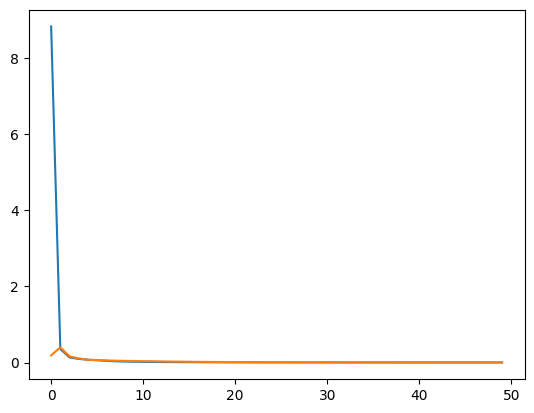

In [89]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [90]:
preds = model.predict(X_test)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


In [91]:
preds = scaler.inverse_transform(preds)

In [92]:
mean_squared_error(Y_test, preds), mean_absolute_error(Y_test, preds), r2_score(Y_test, preds)

(15069.548664412458, 97.42957531637398, 0.7568380675924846)

In [93]:
X_train_numeric = X_train_numeric.reshape(-1, lags, len(X_train_numeric[0]) // lags)

In [94]:
X_train_numeric.shape

(481, 5, 6)

In [95]:
numerical_input = Input(shape=(X_train_numeric.shape[1], X_train_numeric.shape[2]), name='numerical_input')
numerical_output = LSTM(64, activation='relu')(numerical_input)

In [96]:
textual_input = Input(shape=(64,), name='textual_input')
textual_output = Embedding(input_dim=max_words, output_dim=32, input_length=64)(textual_input)
textual_output = LSTM(64)(textual_output)

C:\Users\Mile\myenv\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [97]:
merged_output = concatenate([numerical_output, textual_output])
merged_output = Dense(32, activation='relu')(merged_output)
output = Dense(1, activation='linear', name='output')(merged_output)

In [98]:
model = Model(inputs=[numerical_input, textual_input], outputs=output)

In [99]:
model.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanAbsoluteError()])

In [100]:
history = model.fit([X_train_numeric, X_train_text], Y_train, validation_split=0.2, shuffle=False, batch_size=16, epochs=10)

Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 72ms/step - loss: 0.0099 - mean_absolute_error: 0.0824 - val_loss: 0.0253 - val_mean_absolute_error: 0.1413
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0443 - mean_absolute_error: 0.1807 - val_loss: 0.0678 - val_mean_absolute_error: 0.2541
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0041 - mean_absolute_error: 0.0578 - val_loss: 0.0027 - val_mean_absolute_error: 0.0385
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0014 - mean_absolute_error: 0.0320 - val_loss: 0.0058 - val_mean_absolute_error: 0.0574
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 7.8831e-04 - mean_absolute_error: 0.0215 - val_loss: 0.0036 - val_mean_absolute_error: 0.0438
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0025 - mean_absolute_error: 0.0438 - val_loss: 0.0079 - val_mean_absolute_error: 0.0716
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 9.1080e-04 - mean_absolute_error: 0.0252 - 

In [101]:
X_test_numeric = X_test_numeric.reshape(-1, lags, len(X_test_numeric[0]) // lags)

In [102]:
preds = model.predict([X_test_numeric, X_test_text])

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 170ms/step


In [103]:
preds = scaler.inverse_transform(preds)

In [104]:
mean_squared_error(Y_test, preds), mean_absolute_error(Y_test, preds), r2_score(Y_test, preds)

(114109.77065906383, 271.57931818181817, -0.8412729510315555)

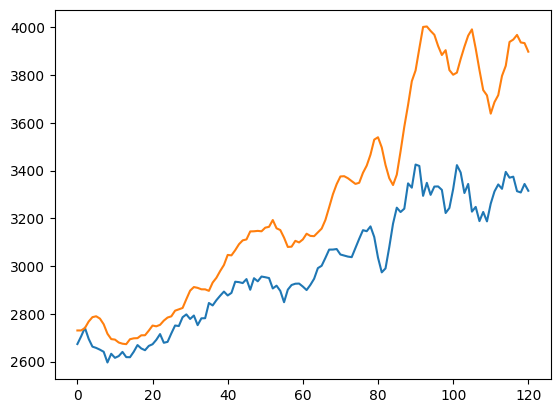

In [105]:
plt.plot(Y_test.values)
plt.plot(preds)
plt.show()